In [135]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer

In [136]:
movies =pd.read_csv('IMDb movies.csv')

C:\Users\hepton\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [137]:
movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In [138]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [139]:
list (movies)
movies.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,8.585500e+04,13305.000000,78258.000000,74058.000000
mean,100.351418,5.898656,9.493490e+03,55.896881,46.040826,27.479989
std,22.553848,1.234987,5.357436e+04,17.784874,178.511411,58.339158
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000
75%,108.000000,6.800000,1.766500e+03,69.000000,27.000000,23.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000


In [140]:
movies.title.value_counts()

Anna                         10
Darling                       8
Solo                          7
Alone                         7
Vendetta                      7
                             ..
She sha shou                  1
Nella camera di Mabel         1
Cash Truck                    1
Sarangni                      1
The Chronicles of Riddick     1
Name: title, Length: 82094, dtype: int64

In [141]:
movies[movies.title.duplicated()]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
91,tt0007801,Cleopatra,Cleopatra,1917,1917-10-14,"Biography, Drama, History",125,USA,English,J. Gordon Edwards,...,"Theda Bara, Fritz Leiber, Thurston Hall, Alan ...","The story of Cleopatra, the fabulous queen of ...",6.5,298,$ 500000,NaN,NaN,NaN,3.0,3.0
308,tt0013597,Sherlock Holmes,Sherlock Holmes,1922,1922-03-07,"Drama, Mystery",85,USA,English,Albert Parker,...,"John Barrymore, Roland Young, Carol Dempster, ...",A young Sherlock Holmes seeks to bring down th...,5.8,551,NaN,$ 384770,NaN,NaN,18.0,15.0
609,tt0018524,Uncle Tom's Cabin,Uncle Tom's Cabin,1927,1928-09-02,"Drama, History",144,USA,English,Harry A. Pollard,...,"Margarita Fischer, James B. Lowe, Arthur Edmun...",Slavery tears apart a black family in the Sout...,6.7,379,$ 1500000,NaN,NaN,NaN,22.0,6.0
726,tt0019850,Erotikon,Erotikon,1929,1929-02-27,"Drama, Romance",85,Czechoslovakia,Czech,Gustav Machatý,...,"Karel Schleichert, Ita Rina, Olaf Fjord, Theod...",A young woman is seduced and abandoned by a ma...,7.2,481,NaN,NaN,NaN,NaN,4.0,8.0
844,tt0020642,Anna Christie,Anna Christie,1930,1930-12-22,Drama,85,USA,German,Jacques Feyder,...,"Greta Garbo, Theo Shall, Hans Junkermann, Salk...",A young woman reunites with her estranged fath...,6.9,775,NaN,NaN,NaN,NaN,16.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85784,tt9820352,Villain,Villain,2020,2020-02-28,"Action, Crime, Drama",97,UK,English,Philip Barantini,...,"Craig Fairbrass, Robert Glenister, George Russ...",Eddie Franks is a former criminal who attempts...,5.7,649,NaN,NaN,NaN,68.0,40.0,37.0
85802,tt9845110,Deux,Deux,2019,2020-02-12,"Comedy, Drama",99,"France, Luxembourg, Belgium","French, German",Filippo Meneghetti,...,"Barbara Sukowa, Martine Chevallier, Léa Drucke...",Pensioners Nina and Madeleine have hidden thei...,7.2,434,EUR 2400000,NaN,$ 172971,NaN,8.0,29.0
85813,tt9861522,Ali,Ali,2019,2019-03-22,Drama,110,Turkey,Turkish,Ramazan Özer,...,"Gürbey Ileri, Hakan Meriçliler, Semra Dinçer, ...",Ali's illness not only changes his life but al...,4.8,126,NaN,NaN,NaN,NaN,NaN,1.0
85820,tt9875852,Domovoy,Domovoy,2019,2019-04-11,"Comedy, Family, Fantasy",90,Russia,Russian,Evgeniy Bedarev,...,"Anastasiya Abadzhidi, Dmitriy Bedarev, Dmitriy...",A single mother buys a flat in the Soviet high...,5.1,168,NaN,NaN,$ 1842316,NaN,NaN,NaN


In [142]:
nun_rows= movies.count(axis=1)<19
nun_rows

0         True
1        False
2         True
3        False
4         True
         ...  
85850     True
85851    False
85852     True
85853     True
85854     True
Length: 85855, dtype: bool

In [143]:
print (movies.count()<35000)

imdb_title_id            False
title                    False
original_title           False
year                     False
date_published           False
genre                    False
duration                 False
country                  False
language                 False
director                 False
writer                   False
production_company       False
actors                   False
description              False
avg_vote                 False
votes                    False
budget                    True
usa_gross_income          True
worlwide_gross_income     True
metascore                 True
reviews_from_users       False
reviews_from_critics     False
dtype: bool


In [144]:
sum(movies.title .isnull())

0

In [145]:
movies_clean = movies.copy()

In [146]:
movies_clean.fillna(0)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,0,0,0,0.0,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,0,0,0.0,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",0,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,0,0,0,0.0,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,0,0,0.0,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,0,0,0,0.0,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,0,0,$ 3507171,0.0,0.0,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,0,0,$ 7299062,0.0,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",0,7.9,265,0,0,0,0.0,0.0,0.0
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",0,6.4,194,0,0,$ 2833,0.0,0.0,0.0


In [147]:
movies_clean["total_reviews"] = movies_clean["reviews_from_users"]+ movies_clean["reviews_from_critics"]
movies_clean

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,total_reviews
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,3.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,14.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,7.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,28.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0,NaN
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0,10.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN,NaN


In [148]:
movies_clean1=movies_clean.drop(('reviews_from_users'),axis = 1)


In [149]:
movies_clean2=movies_clean1.drop(('reviews_from_critics'),axis = 1)


In [150]:
movies_clean3 = movies_clean2.drop(('budget'),axis = 1)

In [151]:
movies_clean4 =  movies_clean3.drop(('metascore'),axis = 1)

In [152]:
movies_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [153]:
movies_clean4.imdb_title_id= movies_clean4.imdb_title_id.str.strip('tt').astype(int)

In [154]:
movies_clean4.sample(5)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,usa_gross_income,worlwide_gross_income,total_reviews
16580,71624,Hot Summer in Barefoot County,Hot Summer in Barefoot County,1974,1974-07-01,"Comedy, Action",90,USA,English,Will Zens,"W. Henry Smith, Joseph A. Alvarez",Preacherman Corporation,"Sherry Robinson, Don Jones, Tonia Bryan, Charl...",A city cop is sent out to the country to go un...,3.8,145,NaN,NaN,14.0
12204,59163,A Falecida,A Falecida,1965,1968-06-14,Drama,90,Brazil,Portuguese,Leon Hirszman,"Eduardo Coutinho, Leon Hirszman",Herbert Richers Produções Cinematográficas,"Fernanda Montenegro, Paulo Gracindo, Ivan Când...",Woman who is obsessed with death wants a first...,7.3,323,NaN,NaN,5.0
78814,5830556,Imagine You & Me,Imagine You & Me,2016,2016-07-23,"Comedy, Drama, Romance",120,Philippines,"Filipino, Tagalog",Michael Tuviera,"Renato Custodio Jr., Aloy Adlawan",APT Entertainment,"Alden Richards, Maine Mendoza, Jasmin Curtis S...","After accepting a job as a caregiver in Italy,...",6.6,239,NaN,$ 97400,2.0
17238,73736,The Specialist,The Specialist,1975,1975-05-01,Thriller,93,USA,English,Howard Avedis,"Ralph B. Potts, Howard Avedis",Renaissance Productions,"Adam West, John Anderson, Ahna Capri, Harvey J...",Adam West stars in The Specialist as Jerry Bou...,4.4,133,NaN,NaN,17.0
11819,58062,Ercole contro i figli del sole,Ercole contro i figli del sole,1964,1964-08-08,Adventure,88,"Italy, Spain",Italian,Osvaldo Civirani,"Osvaldo Civirani, Osvaldo Civirani",Hispamer Films,"Mark Forest, Anna-Maria Pace, Giuliano Gemma, ...",Hercules is rescued by Prince Maytha and his w...,4.4,154,NaN,NaN,11.0


In [155]:
movies_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  int32  
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [156]:
 movies_clean4= movies_clean4[~((movies_clean4.title.duplicated()) & movies_clean4. title .notnull())]
movies_clean4

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,usa_gross_income,worlwide_gross_income,total_reviews
0,9,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,3.0
1,574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,NaN,NaN,14.0
2,1892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,7.0
3,2101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,NaN,NaN,28.0
4,2130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,$ 3507171,NaN
85851,9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,$ 7299062,10.0
85852,9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN
85853,9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,$ 2833,NaN


In [157]:
movies_clean5 =  movies_clean4.drop(('usa_gross_income'),axis = 1)
movies_clean6 =  movies_clean5.drop(('worlwide_gross_income'),axis = 1)
movies_clean6

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,total_reviews
0,9,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,3.0
1,574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,14.0
2,1892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,7.0
3,2101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,28.0
4,2130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN
85851,9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,10.0
85852,9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN
85853,9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN


In [158]:
movies_clean6

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,total_reviews
0,9,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,3.0
1,574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,14.0
2,1892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,7.0
3,2101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,28.0
4,2130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN
85851,9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,10.0
85852,9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN
85853,9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN


In [159]:
movies_clean6.avg_vote.count()

82094

In [160]:
movies_clean6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82094 entries, 0 to 85854
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_title_id       82094 non-null  int32  
 1   title               82094 non-null  object 
 2   original_title      82094 non-null  object 
 3   year                82094 non-null  object 
 4   date_published      82094 non-null  object 
 5   genre               82094 non-null  object 
 6   duration            82094 non-null  int64  
 7   country             82034 non-null  object 
 8   language            81299 non-null  object 
 9   director            82013 non-null  object 
 10  writer              80587 non-null  object 
 11  production_company  77770 non-null  object 
 12  actors              82029 non-null  object 
 13  description         80019 non-null  object 
 14  avg_vote            82094 non-null  float64
 15  votes               82094 non-null  int64  
 16  tota

In [161]:
movies_clean7=movies_clean6.dropna(axis=0)
movies_clean7

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,total_reviews
0,9,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,3.0
1,574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,14.0
3,2101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,28.0
4,2130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,45.0
5,2199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85839,9898858,Coffee & Kareem,Coffee & Kareem,2020,2020-04-03,"Action, Comedy",88,USA,English,Michael Dowse,Shane Mack,Pacific Electric Picture Company,"Ed Helms, Taraji P. Henson, Terrence Little Ga...",Twelve-year-old Kareem Manning hires a crimina...,5.1,10627,452.0
85842,9900060,Lupin III: La menzogna di Fujiko Mine,Lupin the IIIrd: Mine Fujiko no Uso,2019,2019-05-31,"Animation, Adventure, Crime",58,Japan,Japanese,Takeshi Koike,"Monkey Punch, Laura Megan Stahl",TMS Entertainment,"Kan'ichi Kurita, Kiyoshi Kobayashi, Miyuki Saw...",Fujiko befriends a young boy whose late father...,6.9,103,2.0
85843,9900782,Kaithi,Kaithi,2019,2019-10-25,"Action, Thriller",145,India,Tamil,Lokesh Kanagaraj,"Lokesh Kanagaraj, Pon Parthiban",Dream Warrior Pictures,"Karthi, Narain, Ramana, George Maryan, Harish ...",A recently released prisoner becomes involved ...,8.5,8400,196.0
85846,9904802,Enemy Lines,Enemy Lines,2020,2020-05-04,War,92,UK,"English, Polish, Russian, German",Anders Banke,"Michael Wright, Tom George",Happy Hour Films,"Ed Westwick, John Hannah, Tom Wisdom, Corey Jo...","In the frozen, war torn landscape of occupied ...",5.0,764,35.0


In [162]:
movies_clean7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62433 entries, 0 to 85851
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_title_id       62433 non-null  int32  
 1   title               62433 non-null  object 
 2   original_title      62433 non-null  object 
 3   year                62433 non-null  object 
 4   date_published      62433 non-null  object 
 5   genre               62433 non-null  object 
 6   duration            62433 non-null  int64  
 7   country             62433 non-null  object 
 8   language            62433 non-null  object 
 9   director            62433 non-null  object 
 10  writer              62433 non-null  object 
 11  production_company  62433 non-null  object 
 12  actors              62433 non-null  object 
 13  description         62433 non-null  object 
 14  avg_vote            62433 non-null  float64
 15  votes               62433 non-null  int64  
 16  tota

In [163]:
movies_clean7['avg_vote']=np.round(movies_clean7['avg_vote'], decimals=0)
movies_clean7.avg_vote.astype(object)

<ipython-input-163-91e3a2525c80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean7['avg_vote']=np.round(movies_clean7['avg_vote'], decimals=0)


0        6
1        6
3        5
4        7
5        6
        ..
85839    5
85842    7
85843    8
85846    5
85851    8
Name: avg_vote, Length: 62433, dtype: object

In [164]:
movies_clean7['avg_vote']=movies_clean7['avg_vote'].replace(['1.0','2.0','3.0','4.0','5.0'],0)
movies_clean7['avg_vote']=movies_clean7['avg_vote'].replace(['6.0','7.0','8.0','9.0','10.0'],1)

<ipython-input-164-c4a19a6b2f5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean7['avg_vote']=movies_clean7['avg_vote'].replace(['1.0','2.0','3.0','4.0','5.0'],0)
<ipython-input-164-c4a19a6b2f5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean7['avg_vote']=movies_clean7['avg_vote'].replace(['6.0','7.0','8.0','9.0','10.0'],1)


In [165]:
movies_clean7=movies_clean7.drop(columns=['year'],axis=1)
from sklearn.preprocessing import LabelEncoder
movies_clean8=movies_clean7.apply(LabelEncoder().fit_transform)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
x=movies_clean8.drop(columns=['avg_vote'],axis=1)
y=movies_clean8['avg_vote']
from sklearn.model_selection import train_test_split
tree=DecisionTreeClassifier()
tree.fit(x,y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
res=tree.predict(x_test)
from sklearn.metrics import accuracy_score



score=accuracy_score(y_test,res)
score

1.0

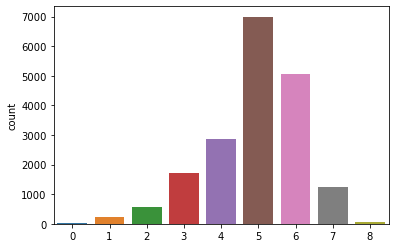

In [192]:
res=tree.predict(x_test)
sb.countplot(res,data=movies_clean7)

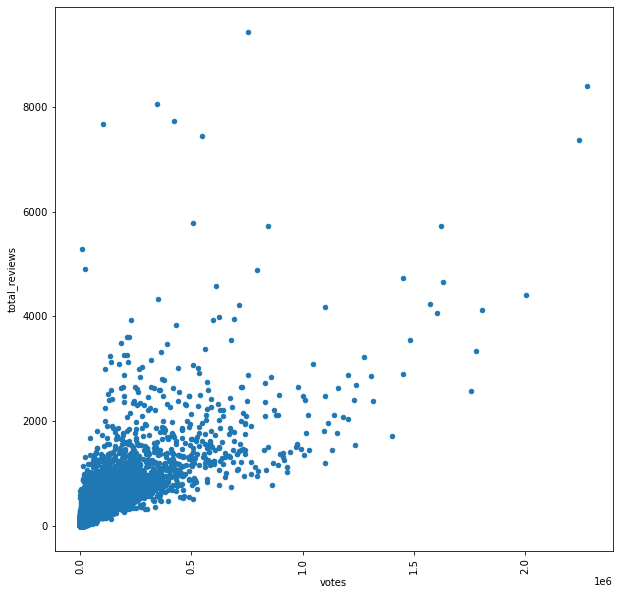

In [204]:
movies_clean7.plot(x='votes',y='total_reviews',kind='scatter',figsize=(10,10))
plt.xticks(rotation=90);

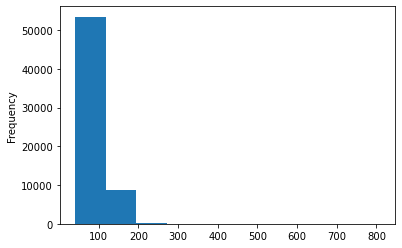

In [168]:
movies_clean7['duration'].plot(kind='hist')

In [ ]:
figure = plt.figure(figsize=(20,5))
ax=sb.countplot(x='votes',data=movies_clean7)
plt.xticks(rotation=90)

(array([    0,     1,     2, ..., 14165, 14166, 14167]),
 <a list of 14168 Text major ticklabel objects>)

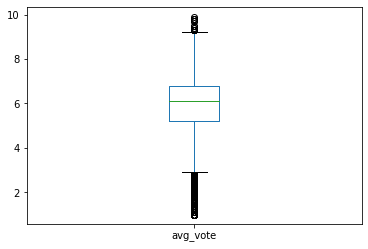

In [170]:
movies['avg_vote'].plot(kind='box')

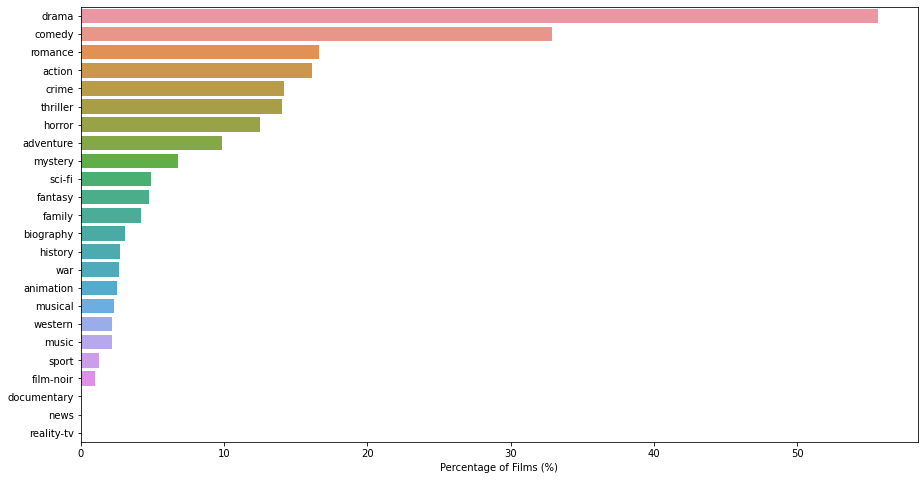

In [173]:
temp = movies_clean7.genre.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sb.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

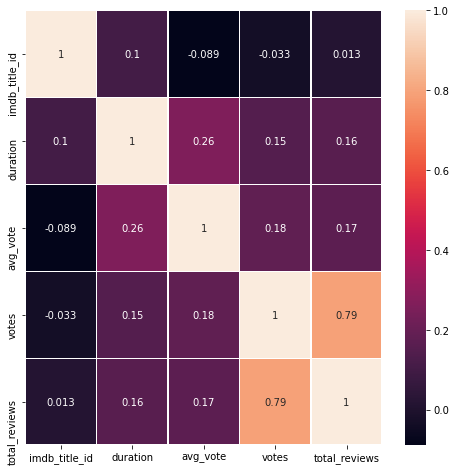

In [190]:
figure,axis = plt.subplots(figsize=(8,8))
corr=movies_clean7.corr()
crmap = sb.heatmap(corr, annot=True,linewidths=.6)

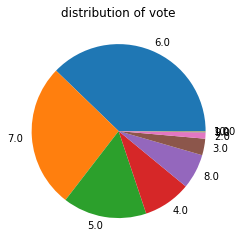

In [218]:
plt.pie(movies_clean7['avg_vote'].value_counts(),labels=movies_clean7['avg_vote'].value_counts().index,wedgeprops = {'width' : 1})
plt.title('distribution of vote')
plt.show()